In [16]:
# 1. Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy.io.arff import loadarff 
import visualization
import category_encoders as ce
import seaborn as sns

# Afficher les graphiques dans le notebook
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [17]:
# 2. Définir les noms de colonnes, selon ton fichier (26 colonnes, dernière = class1)
columns = [
    'duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat',
    'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 
    'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 
    'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'
]

In [18]:
# 3. Chargement du dataset 
raw_data = loadarff('../datasets/Scenario A1-ARFF/TimeBasedFeatures-Dataset-15s-VPN.arff')
df = pd.DataFrame(raw_data[0])

In [19]:
# 4. Exploration rapide
print("Shape:", df.shape)
display(df.head())
display(df.describe(include='all'))
print("\nValeurs des classes :")
display(df['class1'].value_counts())

Shape: (18758, 24)


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,4802.688438,4.0,1523088.0,97590.739583,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,4340.186245,4.0,1517774.0,87383.785714,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,4161.512416,15.0,1079974.0,89312.019231,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,3918.666087,8.0,2441990.0,127659.871795,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,2802.540152,10.0,3042717.0,133013.359551,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'VPN'
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9793
mean,9.791705e+06,6.086783e+05,6.267802e+05,3.314204e+06,2.861716e+06,1.003929e+06,9.218250e+05,8.448286e+05,6.133578e+05,2073.780095,4.518895e+05,4.165270e+04,3.856132e+06,4.768167e+05,1.035025e+06,3.253846e+06,3.635654e+06,4.091204e+06,5.025001e+05,2.983753e+06,3.325142e+06,3.732466e+06,4.531389e+05,NaN
std,1.438458e+07,2.243195e+06,2.326442e+06,1.062115e+07,9.652561e+06,3.141855e+06,2.495984e+06,4.336559e+06,2.516395e+06,19115.713624,8.856083e+06,4.433155e+05,1.387048e+07,1.404428e+06,3.534085e+06,1.342955e+07,1.356162e+07,1.400211e+07,2.813959e+06,1.334323e+07,1.347430e+07,1.390155e+07,2.785573e+06,NaN
min,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-1.247000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,NaN
25%,3.346690e+05,7.000000e+00,2.000000e+00,2.597050e+04,2.454225e+04,1.154333e+04,5.626786e+03,1.145469e+02,0.000000e+00,2.599190,3.862042e+02,3.000000e+00,2.588575e+04,9.577449e+03,5.574602e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,NaN
50%,1.109263e+07,6.200000e+01,2.100000e+01,2.821430e+05,2.865800e+05,5.104959e+04,3.526250e+04,1.164916e+04,9.605910e+03,11.681220,2.657059e+03,1.700000e+01,3.508775e+05,8.412602e+04,7.518175e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,NaN
75%,1.494537e+07,1.645000e+03,1.651000e+03,4.289454e+06,4.265465e+06,5.260302e+05,4.843726e+05,6.055940e+05,5.340370e+05,100.671695,1.351181e+04,1.710000e+02,4.696002e+06,3.119330e+05,7.659213e+05,2.767727e+06,4.248512e+06,5.690602e+06,0.000000e+00,1.943930e+06,3.333185e+06,4.696002e+06,0.000000e+00,NaN



Valeurs des classes :


class1
b'VPN'        9793
b'Non-VPN'    8965
Name: count, dtype: int64

In [20]:
# 5. Nettoyage de base
df = df.replace(['-1', '?'], np.nan)
for col in df.columns:
    if col != 'class1':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérifier le taux de valeurs manquantes
print("\nProportion de valeurs manquantes :")
display(df.isna().mean())


Proportion de valeurs manquantes :


duration              0.0
total_fiat            0.0
total_biat            0.0
min_fiat              0.0
min_biat              0.0
max_fiat              0.0
max_biat              0.0
mean_fiat             0.0
mean_biat             0.0
flowPktsPerSecond     0.0
flowBytesPerSecond    0.0
min_flowiat           0.0
max_flowiat           0.0
mean_flowiat          0.0
std_flowiat           0.0
min_active            0.0
mean_active           0.0
max_active            0.0
std_active            0.0
min_idle              0.0
mean_idle             0.0
max_idle              0.0
std_idle              0.0
class1                0.0
dtype: float64

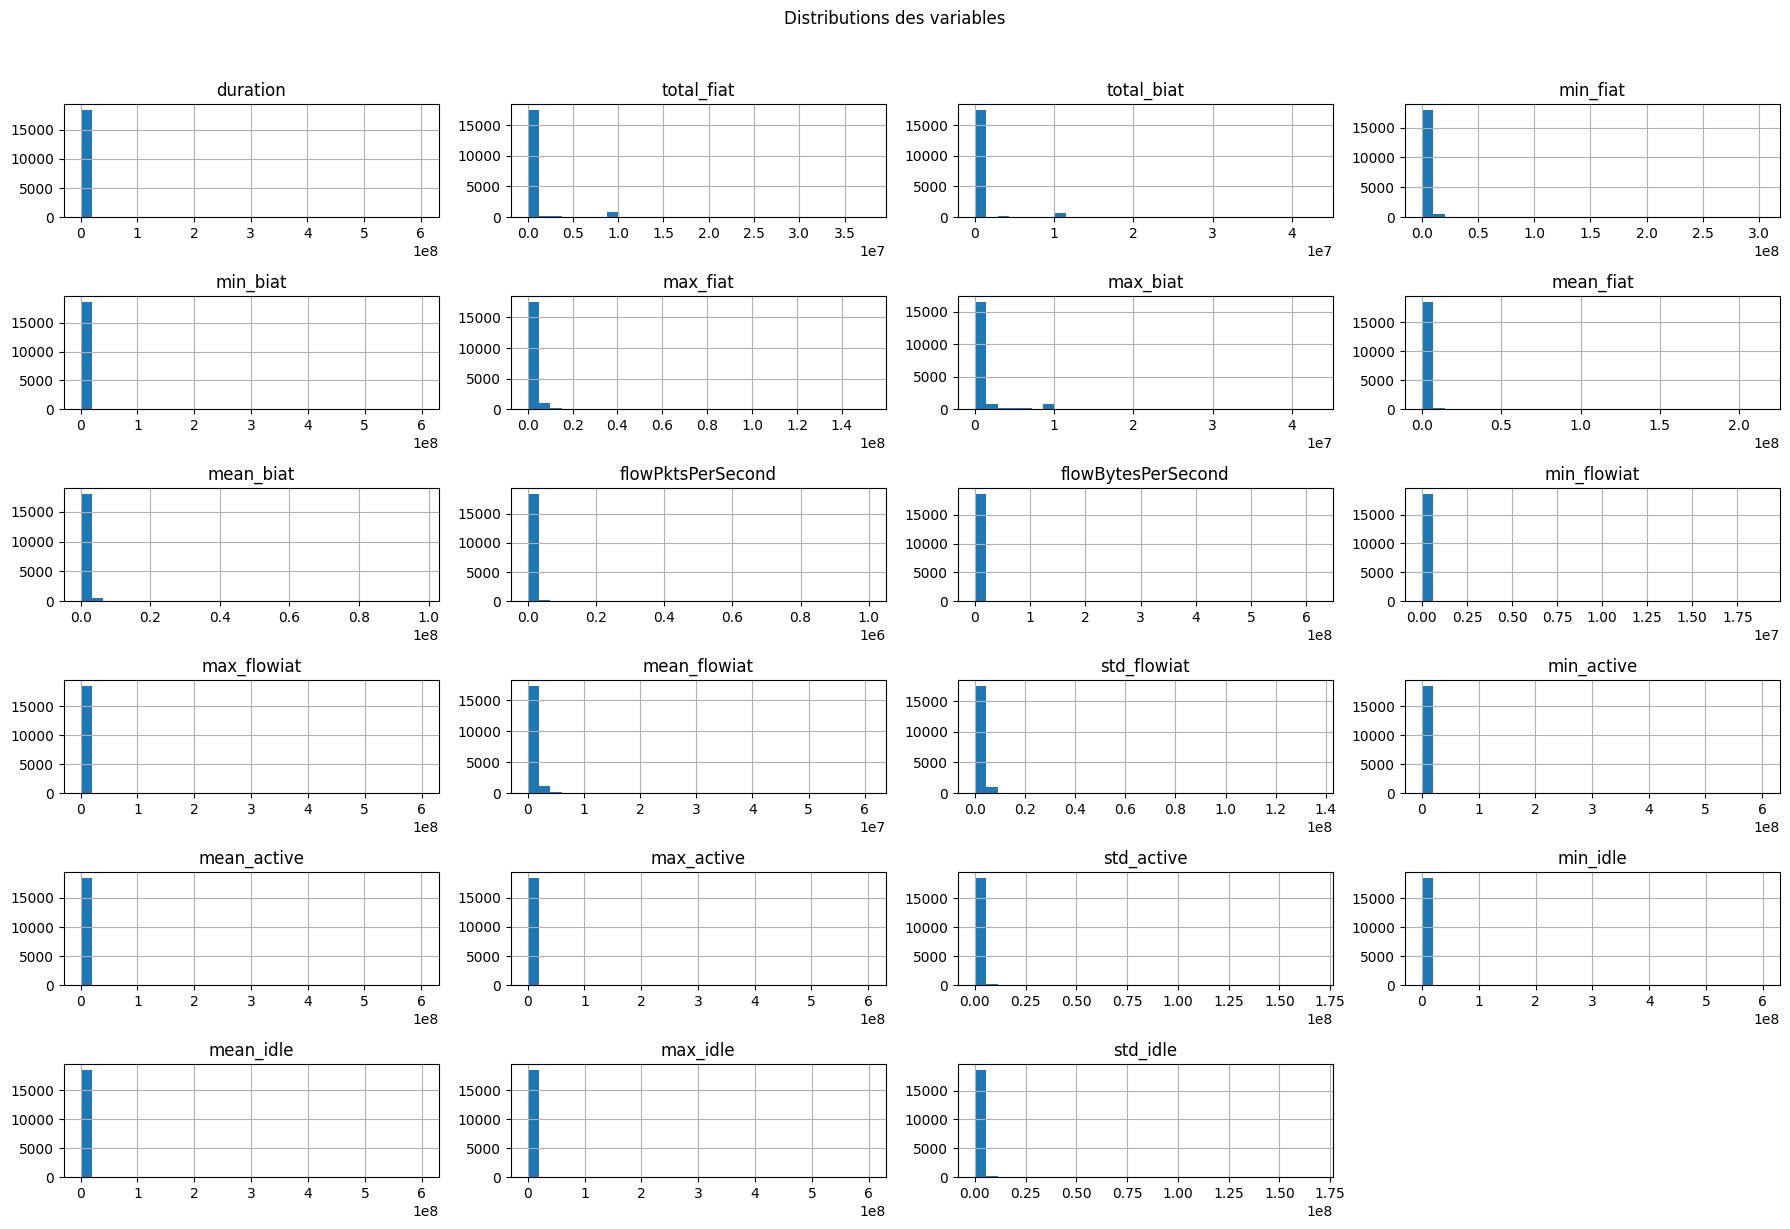

In [21]:
# 6. Histogrammes des variables numériques
df.drop('class1', axis=1).hist(bins=30, figsize=(18,12), layout=(6,4))
plt.suptitle('Distributions des variables', y=1.02)
plt.tight_layout()
plt.show()

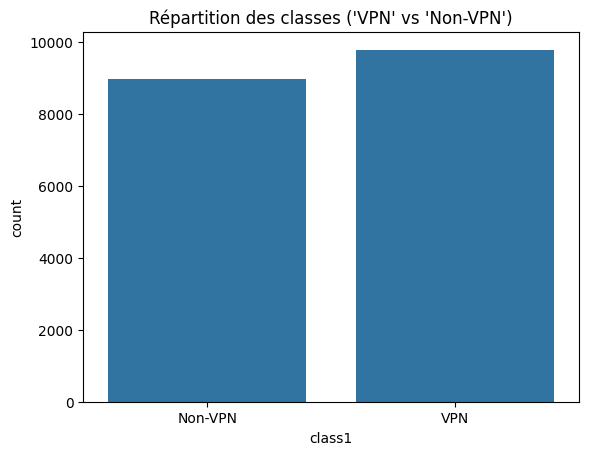

In [22]:
# 7. Répartition des classes
sns.countplot(x='class1', data=df)
plt.title("Répartition des classes ('VPN' vs 'Non-VPN')")
plt.show()

In [23]:
# 8. Statistiques groupées par classe
display(df.groupby('class1').mean())

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,flowBytesPerSecond,min_flowiat,max_flowiat,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
class1,,,,,,,,,,,,,,,,,,,,,,,
b'Non-VPN',1.091986e+07,263923.128500,283609.113553,3.557703e+06,2.370288e+06,7.483861e+05,5.752619e+05,1.077064e+06,609805.598422,1653.957849,740092.777323,28399.182153,4.103021e+06,401642.050080,1.019776e+06,3.396296e+06,3.791869e+06,4.251225e+06,517975.555881,3.222947e+06,3.583473e+06,4.001298e+06,476559.267251
b'VPN',8.758938e+06,924284.334423,940936.041662,3.091292e+06,3.311594e+06,1.237865e+06,1.239086e+06,6.322287e+05,616609.613284,2458.106292,188053.830542,53785.626774,3.630118e+06,545635.414275,1.048985e+06,3.123440e+06,3.492648e+06,3.944713e+06,488333.100319,2.764782e+06,3.088653e+06,3.486364e+06,431698.738400


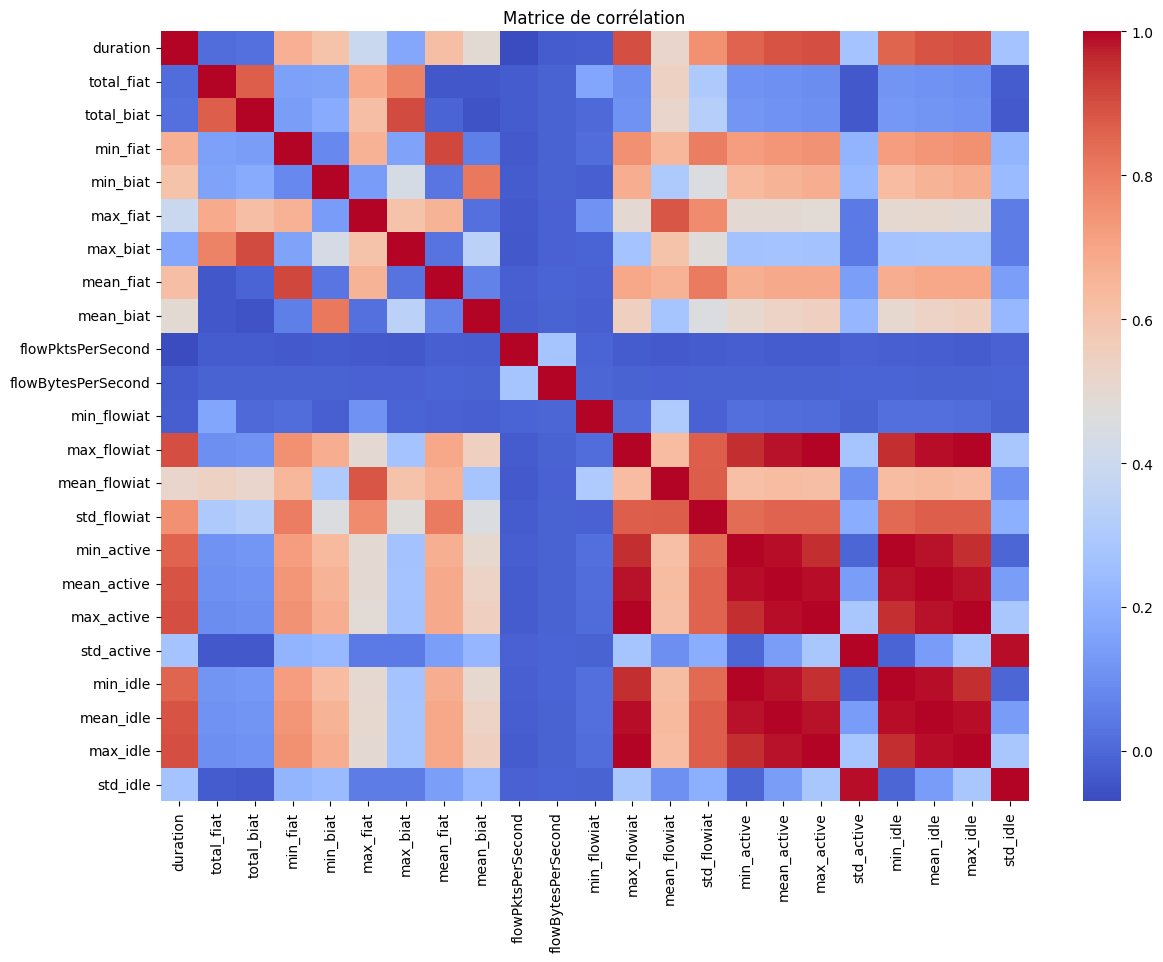

In [24]:
# 9. Heatmap de corrélation (seulement pour les numériques)
plt.figure(figsize=(14,10))
sns.heatmap(df.drop('class1', axis=1).corr(), cmap='coolwarm', annot=False)
plt.title('Matrice de corrélation')
plt.show()

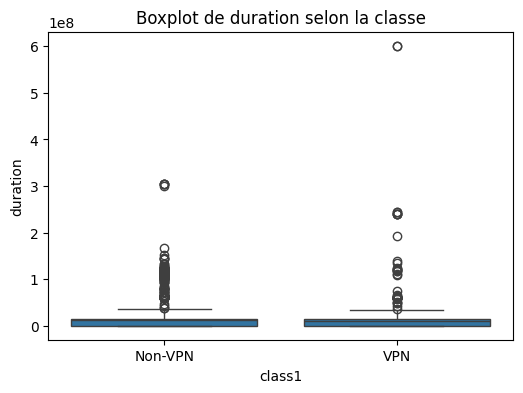

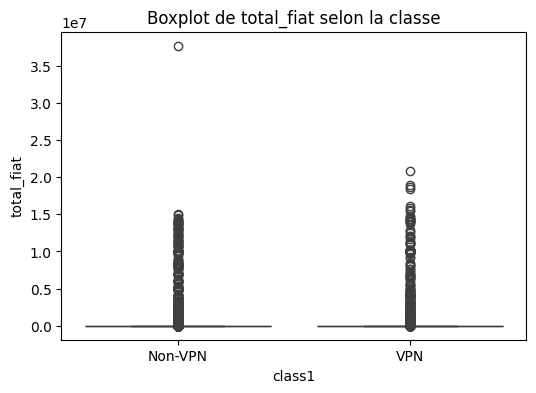

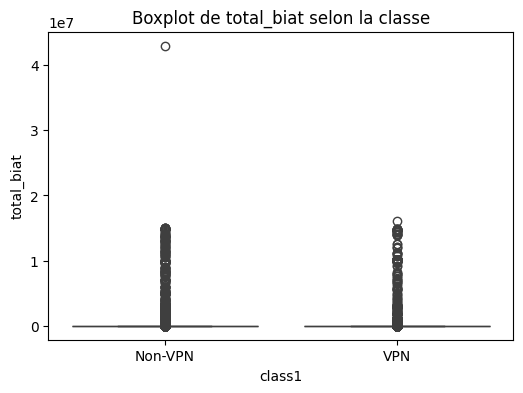

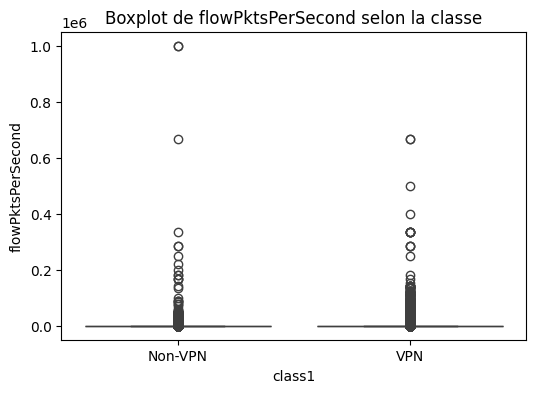

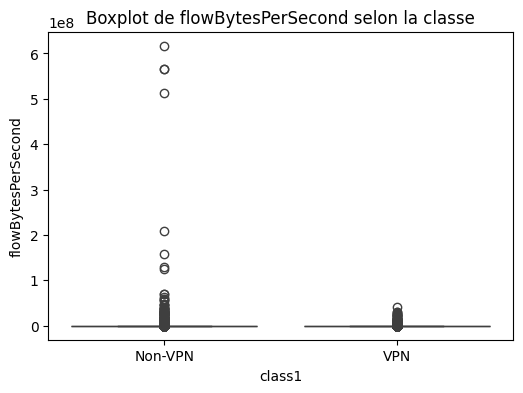

In [25]:
# 10. Boxplots comparatifs de quelques variables clés
features = ['duration', 'total_fiat', 'total_biat', 'flowPktsPerSecond', 'flowBytesPerSecond']
for feat in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='class1', y=feat)
    plt.title(f'Boxplot de {feat} selon la classe')
    plt.show()

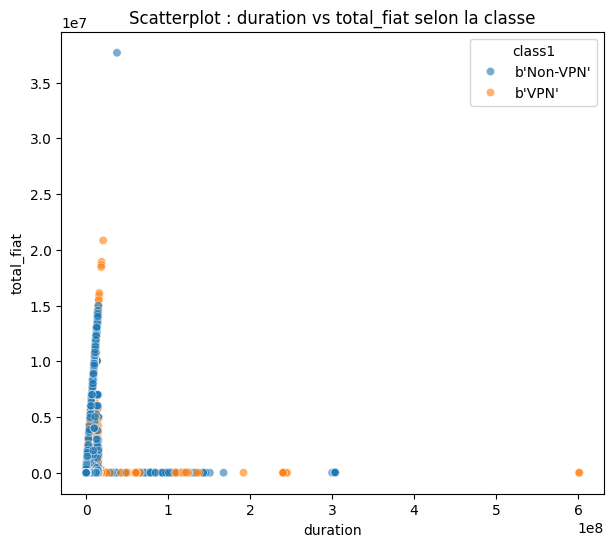

In [26]:
# 11. Scatterplot pour visualiser la séparation entre classes (2 variables, exemple)
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='duration', y='total_fiat', hue='class1', alpha=0.6)
plt.title("Scatterplot : duration vs total_fiat selon la classe")
plt.show()